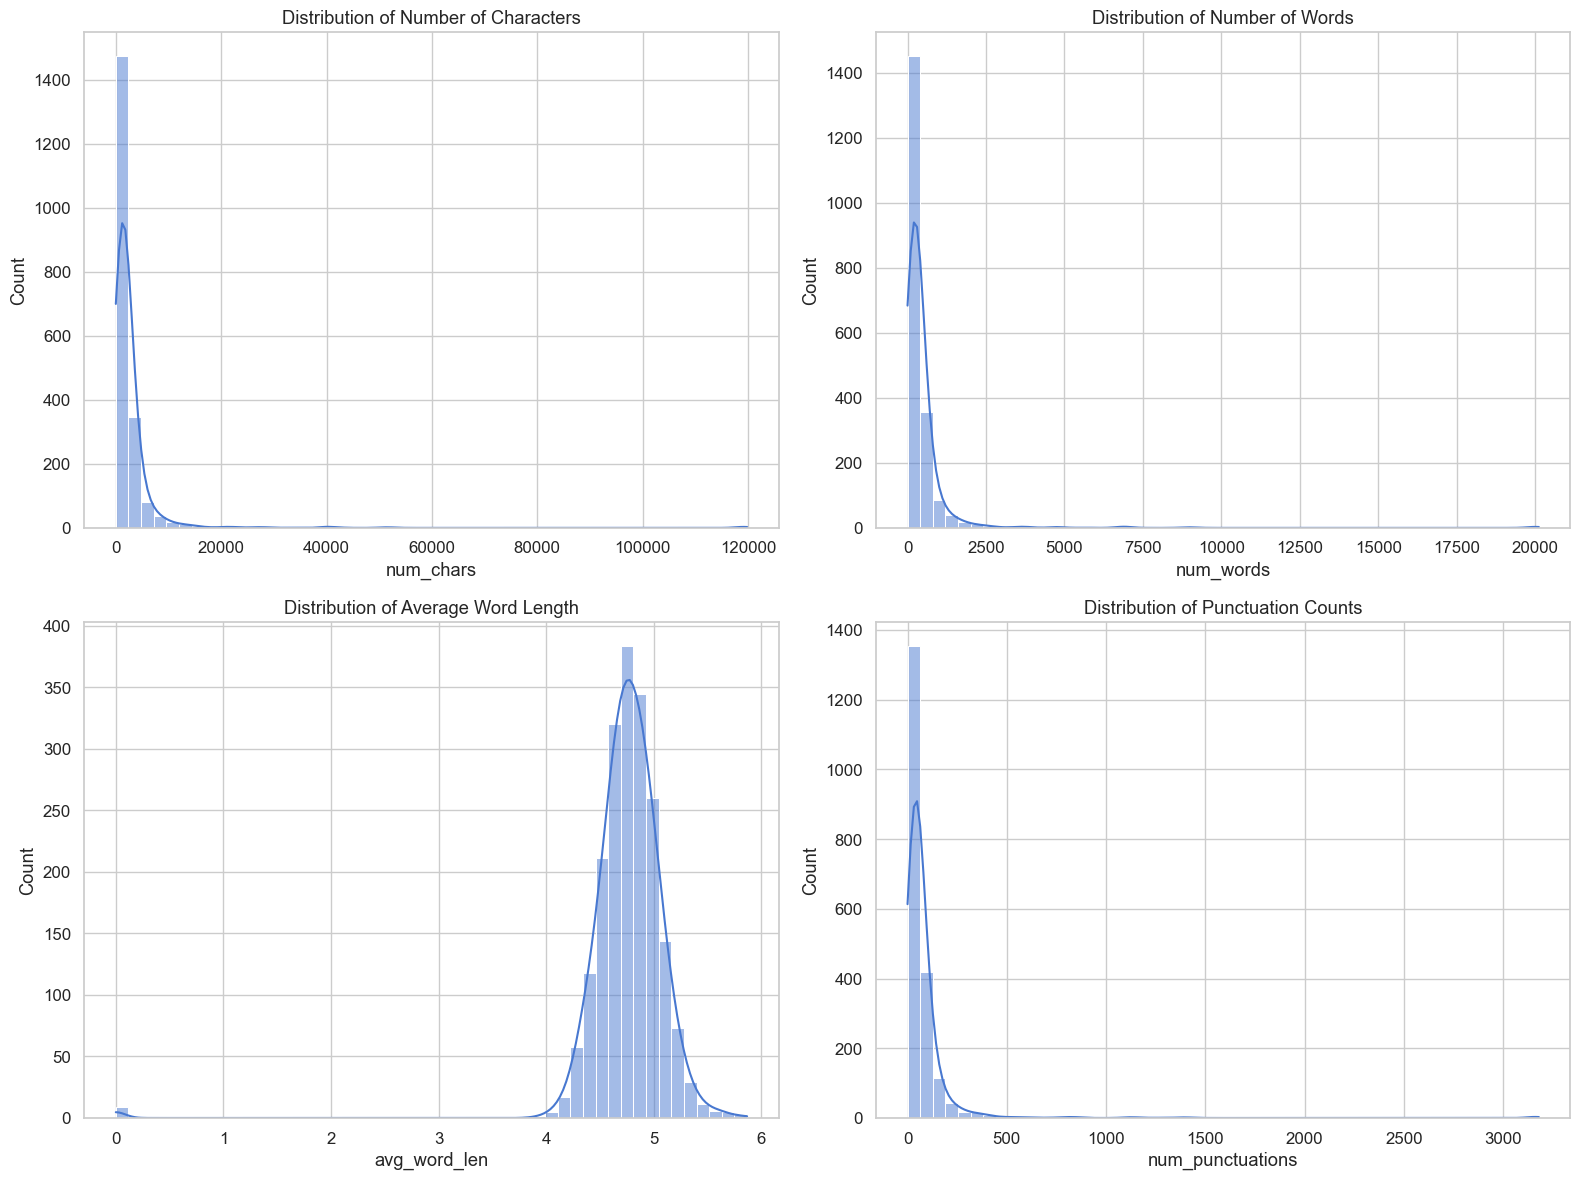

Missing Values:
 case_id             0
case_outcome        0
case_title          0
case_text           0
num_chars           0
num_words           0
avg_word_len        0
num_punctuations    0
dtype: int64

Summary Statistics:
            num_chars     num_words  avg_word_len  num_punctuations
count    2000.000000   2000.000000   2000.000000       2000.000000
mean     2679.418000    459.877500      4.757351         79.763000
std      7035.775322   1188.035332      0.409408        188.617096
min         0.000000      0.000000      0.000000          0.000000
25%       835.000000    147.000000      4.608546         28.000000
50%      1392.000000    241.000000      4.771033         45.000000
75%      2496.000000    430.000000      4.940577         78.000000
max    119832.000000  20116.000000      5.866667       3180.000000

Categorical Columns:
 ['case_id', 'case_outcome', 'case_title', 'case_text']


In [1]:
#1. Preprocessing:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

# 1. Load the dataset
file_path = "legal_text_classification.csv"
df = pd.read_csv(file_path)

# 2. Sample 2,000 rows with random_state=4081
df_sampled = df.sample(n=2000, random_state=4081).reset_index(drop=True)

# 3. Handle missing values
# Fill missing 'case_text' with empty strings
df_sampled['case_text'] = df_sampled['case_text'].fillna("")

# 4. Extract features from case_text
def extract_features(text):
    num_chars = len(text)
    num_words = len(text.split())
    avg_word_len = np.mean([len(word) for word in text.split()]) if num_words > 0 else 0
    num_punctuations = sum(1 for c in text if c in string.punctuation)
    return pd.Series([num_chars, num_words, avg_word_len, num_punctuations])

df_sampled[['num_chars', 'num_words', 'avg_word_len', 'num_punctuations']] = df_sampled['case_text'].apply(extract_features)

# 5. Summary statistics
summary_stats = df_sampled[['num_chars', 'num_words', 'avg_word_len', 'num_punctuations']].describe()

# 6. Check for missing values
missing_values = df_sampled.isnull().sum()

# 7. Check for categorical variables
categorical_columns = df_sampled.select_dtypes(include=['object']).columns.tolist()

# 8. Exploratory Data Analysis (EDA)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.histplot(df_sampled['num_chars'], bins=50, kde=True)
plt.title("Distribution of Number of Characters")

plt.subplot(2, 2, 2)
sns.histplot(df_sampled['num_words'], bins=50, kde=True)
plt.title("Distribution of Number of Words")

plt.subplot(2, 2, 3)
sns.histplot(df_sampled['avg_word_len'], bins=50, kde=True)
plt.title("Distribution of Average Word Length")

plt.subplot(2, 2, 4)
sns.histplot(df_sampled['num_punctuations'], bins=50, kde=True)
plt.title("Distribution of Punctuation Counts")

plt.tight_layout()
plt.show()

# 9. Show summary results
print("Missing Values:\n", missing_values)
print("\nSummary Statistics:\n", summary_stats)
print("\nCategorical Columns:\n", categorical_columns)



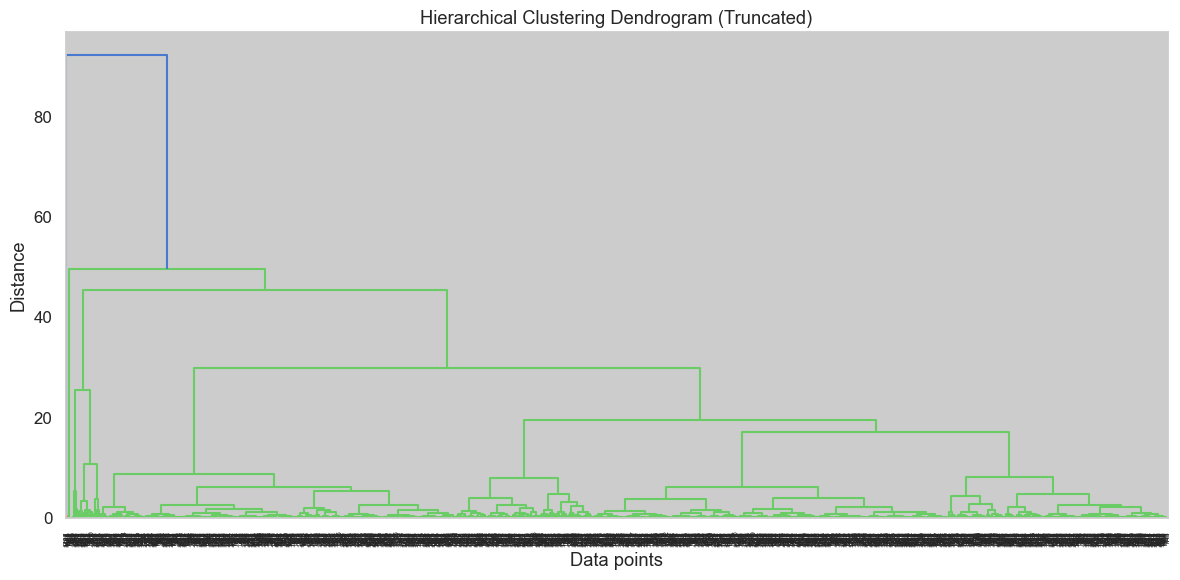

In [2]:
# 2. Clustering:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Load the sampled dataset again
file_path = "legal_text_classification.csv"
df = pd.read_csv(file_path)
df_sampled = df.sample(n=2000, random_state=4081).reset_index(drop=True)

# Fill missing values in 'case_text' column
df_sampled['case_text'] = df_sampled['case_text'].fillna("")

# Extract numerical features from text
def extract_features(text):
    num_chars = len(text)
    num_words = len(text.split())
    avg_word_len = np.mean([len(word) for word in text.split()]) if num_words > 0 else 0
    num_punctuations = sum([1 for c in text if c in '.,;:!?'])
    return pd.Series([num_chars, num_words, avg_word_len, num_punctuations])

df_sampled[['num_chars', 'num_words', 'avg_word_len', 'num_punctuations']] = df_sampled['case_text'].apply(extract_features)

# Features to be used for clustering
X_features = df_sampled[['num_chars', 'num_words', 'avg_word_len', 'num_punctuations']]

# Normalize the data before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Perform hierarchical clustering and plot dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=30)
plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


In [3]:
#3. Regression:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math

# Define features and numerical encoding of the target
X = X_scaled
y = df_sampled['case_outcome'].astype('category').cat.codes  # Convert class label to numerical codes

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4081)

# Dictionary to store results
results = {}

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'RMSE': math.sqrt(mean_squared_error(y_test, y_pred_lr)),
    'R2': r2_score(y_test, y_pred_lr)
}

# 2. KNN Regression (k=5 arbitrarily)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results['KNN Regression (k=5)'] = {
    'MSE': mean_squared_error(y_test, y_pred_knn),
    'RMSE': math.sqrt(mean_squared_error(y_test, y_pred_knn)),
    'R2': r2_score(y_test, y_pred_knn)
}

# 3. Decision Tree Regression
dt = DecisionTreeRegressor(random_state=4081)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
results['Decision Tree Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'RMSE': math.sqrt(mean_squared_error(y_test, y_pred_dt)),
    'R2': r2_score(y_test, y_pred_dt)
}

# 4. Random Forest Regression
rf = RandomForestRegressor(random_state=4081)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['Random Forest Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'RMSE': math.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'R2': r2_score(y_test, y_pred_rf)
}

# Function to find optimal number of neighbors for KNN regression
def best_knn_r2(X_train, X_test, y_train, y_test, max_k=50):
    best_k = 1
    best_r2 = -float("inf")
    r2_scores = []
    for k in range(1, max_k + 1):
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        r2 = r2_score(y_test, model.predict(X_test))
        r2_scores.append((k, r2))
        if r2 > best_r2:
            best_r2 = r2
            best_k = k
    return best_k, best_r2, r2_scores

best_k_value, best_k_r2, all_k_r2 = best_knn_r2(X_train, X_test, y_train, y_test)

results, best_k_value, best_k_r2


({'Linear Regression': {'MSE': 4.9574265615144935,
   'RMSE': 2.2265279161767753,
   'R2': 0.005001097823791545},
  'KNN Regression (k=5)': {'MSE': 6.0192000000000005,
   'RMSE': 2.453405796031305,
   'R2': -0.20810612475303425},
  'Decision Tree Regression': {'MSE': 9.82984693877551,
   'RMSE': 3.135258671748714,
   'R2': -0.9729363191320373},
  'Random Forest Regression': {'MSE': 5.307787535366995,
   'RMSE': 2.303863610409044,
   'R2': -0.06531941626207471}},
 48,
 0.008100218479840215)

In [4]:
#4. Classification:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

file_path = "legal_text_classification.csv"
df = pd.read_csv(file_path)
df_sampled = df.sample(n=2000, random_state=4081).reset_index(drop=True)

df_sampled['case_text'] = df_sampled['case_text'].fillna("")

def extract_features(text):
    num_chars = len(text)
    num_words = len(text.split())
    avg_word_len = np.mean([len(word) for word in text.split()]) if num_words > 0 else 0
    num_punctuations = sum([1 for c in text if c in "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"])
    return pd.Series([num_chars, num_words, avg_word_len, num_punctuations])

df_sampled[['num_chars', 'num_words', 'avg_word_len', 'num_punctuations']] = df_sampled['case_text'].apply(extract_features)


df_sampled['target'] = df_sampled['case_outcome'].apply(lambda x: 1 if x == 'cited' else 0)

class_0 = df_sampled[df_sampled['target'] == 0]
class_1 = df_sampled[df_sampled['target'] == 1]
min_len = min(len(class_0), len(class_1))
df_balanced = pd.concat([class_0.sample(min_len, random_state=4081), class_1.sample(min_len, random_state=4081)]).sample(frac=1, random_state=4081)


features = ['num_chars', 'num_words', 'avg_word_len', 'num_punctuations']
X = df_balanced[features]
y = df_balanced['target']


X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X, y, test_size=0.2, random_state=4081, stratify=y)

# Standardization
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_bal_scaled = scaler.transform(X_test_bal)

# 9. Models
models = {
    'Logistic Regression': LogisticRegression(random_state=4081),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=4081),
    'Random Forest': RandomForestClassifier(random_state=4081)
}

# Performance 
results = {}
for name, model in models.items():
    model.fit(X_train_bal_scaled, y_train_bal)
    y_pred = model.predict(X_test_bal_scaled)
    results[name] = {
        'Accuracy': accuracy_score(y_test_bal, y_pred),
        'Precision': precision_score(y_test_bal, y_pred),
        'Recall': recall_score(y_test_bal, y_pred)
    }

# 10-fold CV (sadece Logistic Regression ve Random Forest)
cv_results = {}
for name in ['Logistic Regression', 'Random Forest']:
    model = models[name]
    scores = cross_val_score(model, X_train_bal_scaled, y_train_bal, cv=10, scoring='accuracy')
    cv_results[name] = {
        'CV Mean Accuracy': scores.mean(),
        'CV Fold Accuracies': scores
    }

import pandas as pd
classification_df = pd.DataFrame(results).T
print("Classification Results:")
print(classification_df)

# 10-fold results
cv_df = pd.DataFrame(cv_results).T
print("\nCross-Validation Results:")
print(cv_df)

cv_results


Classification Results:
                     Accuracy  Precision    Recall
Logistic Regression  0.565657   0.544521  0.803030
KNN                  0.553030   0.552764  0.555556
Decision Tree        0.550505   0.550505  0.550505
Random Forest        0.540404   0.537736  0.575758

Cross-Validation Results:
                    CV Mean Accuracy  \
Logistic Regression         0.555557   
Random Forest               0.556198   

                                                    CV Fold Accuracies  
Logistic Regression  [0.5408805031446541, 0.5408805031446541, 0.534...  
Random Forest        [0.5157232704402516, 0.5660377358490566, 0.547...  


{'Logistic Regression': {'CV Mean Accuracy': 0.5555568824138206,
  'CV Fold Accuracies': array([0.5408805 , 0.5408805 , 0.53459119, 0.60377358, 0.62025316,
         0.5443038 , 0.5       , 0.56329114, 0.55696203, 0.55063291])},
 'Random Forest': {'CV Mean Accuracy': 0.5561977549558156,
  'CV Fold Accuracies': array([0.51572327, 0.56603774, 0.54716981, 0.57861635, 0.51898734,
         0.60126582, 0.56329114, 0.55696203, 0.57594937, 0.53797468])}}

In [ ]:
#5. Feature Selection:

import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Assuming X_bal and y_bal are already defined from step 4 (balanced dataset)
# Also assuming X_bal contains only the numeric features extracted earlier

# 5.a Using mutual_info_classif
mi_scores = mutual_info_classif(X_bal, y_bal, random_state=4081)
mi_scores_series = pd.Series(mi_scores, index=X_bal.columns)
top_5_mi_features = mi_scores_series.sort_values(ascending=False).head(5).index.tolist()

# 5.b Train random forest with top 5 mutual information features
rf_mi = RandomForestClassifier(random_state=4081)
scores_mi = cross_val_score(rf_mi, X_bal[top_5_mi_features], y_bal, cv=10)

# Now using RandomForestClassifier feature importances
rf_full = RandomForestClassifier(random_state=4081)
rf_full.fit(X_bal, y_bal)
importances = pd.Series(rf_full.feature_importances_, index=X_bal.columns)
top_5_rf_features = importances.sort_values(ascending=False).head(5).index.tolist()

# Train random forest with top 5 RF importance features
rf_rf = RandomForestClassifier(random_state=4081)
scores_rf = cross_val_score(rf_rf, X_bal[top_5_rf_features], y_bal, cv=10)

# Results
results = {
    "Mutual Info - Top 5 Features": top_5_mi_features,
    "Mutual Info - CV Accuracy (mean)": scores_mi.mean(),
    "RF Importance - Top 5 Features": top_5_rf_features,
    "RF Importance - CV Accuracy (mean)": scores_rf.mean(),
}

results


In [7]:
# 6. PCA:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 1. Define features and target
features = ['num_chars', 'num_words', 'avg_word_len', 'num_punctuations']
X_bal = df_balanced[features]
y_bal = df_balanced['target']

# 2. Standardize the features
scaler = StandardScaler()
X_bal_scaled = scaler.fit_transform(X_bal)

# 3. Apply PCA (up to 4 components, since we have 4 features)
pca = PCA(n_components=4)
X_bal_pca = pca.fit_transform(X_bal_scaled)

# 4. Print explained variance ratios
explained_variance = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance, 1):
    print(f"Component {i}: {ratio:.4f} variance explained")

# 5. Train a Random Forest model using all 4 principal components
rf_pca_model = RandomForestClassifier(random_state=4081)
scores = cross_val_score(rf_pca_model, X_bal_pca, y_bal, cv=10)

# 6. Report results
print("\nCross-Validation Results Using PCA Features:")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"All Fold Accuracies: {scores}")


Component 1: 0.7489 variance explained
Component 2: 0.2483 variance explained
Component 3: 0.0028 variance explained
Component 4: 0.0000 variance explained

Cross-Validation Results Using PCA Features:
Mean Accuracy: 0.5333
All Fold Accuracies: [0.6010101  0.51010101 0.47474747 0.46969697 0.54040404 0.48484848
 0.55555556 0.56060606 0.55555556 0.58080808]
